# Fall 2023 IS 597 Final Project
## The Analysis of Tweets with #ChatGPT
Name: Ruixin Han
GitHub ID: hanlily666

### Hypothesis One
- Tweets containing external links are more likely to direct users to websites of major technology companies, or established news outlets, compared to tweets without external links. Tweets containing external links that belong to major technology companies have more retweets and likes than tweets without external links.

In [1]:
import pandas as pd
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import json
from functions import extract_the_hostname, fetch_url_with_html_tree

In [2]:
# referenced from https://stackoverflow.com/questions/9530950/parsing-hostname-and-port-from-string-or-url 
df = pd.read_csv('chatgpt1.csv')

df = df.dropna(subset=['Outlinks'])

# Convert 'Outlinks' from string representation of list to actual list
df['Outlinks'] = df['Outlinks'].apply(ast.literal_eval)

In [3]:
# Extract hostnames from each URL in 'Outlinks', add them to a list, and add the list as a new column in the DataFrame
df['hostname'] = df['Outlinks'].apply(lambda outlinks: [extract_the_hostname(one) for one in outlinks])
df['hostname']

2        [us02web.zoom.us, twitter.com]
3                         [twitter.com]
5                   [gazetekarinca.com]
6           [www.fierceelectronics.com]
8                [oriori.my.canva.site]
                      ...              
49988                   [t.me, swee.ps]
49991                   [t.me, swee.ps]
49994                        [youtu.be]
49996                [lnkd.in, lnkd.in]
49999                       [drumup.io]
Name: hostname, Length: 19942, dtype: object

In [4]:
# Filter unique hostname by using set. The use of 'explode' is referenced from https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
all_hostnames = set(df['hostname'].explode())
all_hostnames

{'www.nrc.nl',
 'www.fiverr.com',
 'd.nigel.im',
 'mvsnoticias.com',
 'www.karmosis.ca',
 'huguesrey.wordpress.com',
 'arsco.org',
 'discusschatgpt.com',
 'tectoc.blog',
 'copyleaks.com',
 'www.fcw.org.br',
 'timesofindia.indiatimes.com',
 'www.theblaze.com',
 'alperovitch.sais.jhu.edu',
 'spirala.sapir.ac.il',
 'smartpoint7.gumroad.com',
 'atmarkit.itmedia.co.jp',
 'yourcybersafetyadvocate.cpa',
 'player.captivate.fm',
 'mafhome.com',
 'contents.com',
 'gyazo.com',
 'sliceofexperiments.com',
 'www.wionews.com',
 'pressroom.mediatoolstv.com',
 'dld.bz',
 'manualdousuario.net',
 'mobilesyrup.com',
 'cdn.openai.com',
 'www.theyeshivaworld.com',
 'api.openai.com',
 'vixc.com',
 'michelnilles.com',
 'www.eloriente.com',
 'www.sat1regional.de',
 'dineshchandgr.medium.com',
 'www.campopreneur.com',
 'educational-innovation.sydney.edu.au',
 'www.lecho.be',
 'beikokukabu-etf-matome.com',
 'www.timesofupdate.com',
 'cretanbusiness.gr',
 'blendedbayou.com',
 'tecnoempresa.mx',
 'thedenforum.com'

https://stackoverflow.com/questions/11350770/filter-pandas-dataframe-by-substring-criteria

In [5]:
df_forbes = pd.read_csv('Forbes_2000_top_company_CLNQ11.csv')

df_forbes['Organization Name'] = df_forbes['Organization Name'].str.lower()

df_hostnames = pd.DataFrame(list(all_hostnames), columns=['hostname'])

In [6]:
# https://www.back40design.com/blog/what-is-a-company-domain-vs-website/ 
# source: https://stackoverflow.com/questions/39901550/python-userwarning-this-pattern-has-match-groups-to-actually-get-the-groups
# Add a new column 'hostname' to df_forbes that contains the hostname if the 'Organization Name' is in the 'hostname' Series of df_hostnames, otherwise N/A
df_forbes['hostname'] = df_forbes['Organization Name'].apply(lambda x: x if df_hostnames['hostname'].str.contains(x, regex=False).any() else 'N/A')

matched_hostname = df_forbes[df_forbes['hostname'] != 'N/A']
matched_hostname

,2022 Ranking,Organization Name,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees,hostname
5,6,amazon,Retailing,United States,1994,Andy Jassy,469.82,33.36,420.55,1468.40,1608000.0,amazon
6,7,apple,Technology Hardware & Equipment,United States,1976,Tim Cook,378.70,100.56,381.19,2640.32,154000.0,apple
11,12,microsoft,IT Software & Services,United States,1975,Satya Nadella,184.90,71.18,340.39,2054.37,181000.0,microsoft
15,16,shell,Oil & Gas Operations,United Kingdom,1907,Bernardus van Beurden,261.76,20.27,404.38,211.10,82000.0,shell
28,29,total,Oil & Gas Operations,France,1924,Patrick Pouyanné,185.12,16.14,293.46,127.32,101309.0,total
...,...,...,...,...,...,...,...,...,...,...,...,...
1806,1807,nio,Consumer Durables,China,2014,Bin Li,5.60,-1.64,13.00,29.66,0,nio
1832,1833,wsp,Construction,Canada,1987,Alexandre J. L'Heureux,8.20,0.38,8.91,14.47,55000.0,wsp
1888,1889,sca,Household & Personal Products,Sweden,1929,Ulf Örjan Larsson,2.19,0.71,13.06,14.09,3373.0,sca
1937,1938,gap,Retailing,United States,1969,Bobby Martin,16.67,0.26,12.76,4.33,78570.0,gap


In [7]:
df = df.explode('hostname')
df['company_name'] = df['hostname'].apply(lambda x: next((name for name in matched_hostname['hostname'] if name in x), 'N/A'))

merged_df = pd.merge(df, matched_hostname, left_on='company_name', right_on='hostname', how='inner')
merged_df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Industry,Country,Year Founded,CEO,Revenue (Billions),Profits (Billions),Assets (Billions),Market Value (Billions),Total Employees,hostname_y
0,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,[https://us02web.zoom.us/webinar/register/8016...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,...,IT Software & Services,United States,2006,Jack Patrick Dorsey,5.08,-0.22,14.06,39.17,7500.0,twitter
1,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,[https://twitter.com/agadmator/status/16171550...,['https://t.co/ENTSzi2AQ9'],0,0,...,IT Software & Services,United States,2006,Jack Patrick Dorsey,5.08,-0.22,14.06,39.17,7500.0,twitter
2,2023-01-22 13:45:15+00:00,1617156441420271618,🤯 #ChatGPT writes excel formulas!\n\n#Microsof...,JakeMillerTech,https://twitter.com/JakeMillerTech/status/1617...,https://twitter.com/JakeMillerTech,[https://twitter.com/mtholfsen/status/16165887...,['https://t.co/aBiphFuQWM'],0,6,...,IT Software & Services,United States,2006,Jack Patrick Dorsey,5.08,-0.22,14.06,39.17,7500.0,twitter
3,2023-01-22 13:49:19+00:00,1617157465346539521,明日のテストの点数は、chatgptの点数です。 https://t.co/9QPr2xrpzw,natchiena,https://twitter.com/natchiena/status/161715746...,https://twitter.com/natchiena,[https://twitter.com/natchiena/status/16171532...,['https://t.co/9QPr2xrpzw'],1,1,...,IT Software & Services,United States,2006,Jack Patrick Dorsey,5.08,-0.22,14.06,39.17,7500.0,twitter
4,2023-01-22 13:49:50+00:00,1617157592694001666,同じようにChatGPTにわいの業績を聞いてみたら、政治と教育と文化において重要な役割を担っ...,kazcrtv,https://twitter.com/kazcrtv/status/16171575926...,https://twitter.com/kazcrtv,[https://twitter.com/sociologbook/status/16167...,['https://t.co/C2Y96lGtvR'],0,0,...,IT Software & Services,United States,2006,Jack Patrick Dorsey,5.08,-0.22,14.06,39.17,7500.0,twitter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,2023-01-23 22:00:31+00:00,1617643465281622016,Scene writer Liam Price discusses the connecti...,NDSMCObserver,https://twitter.com/NDSMCObserver/status/16176...,https://twitter.com/NDSMCObserver,[https://ndsmcobserver.com/2023/01/black-mirro...,['https://t.co/wlJw9qo9Ol'],0,0,...,Materials,Netherlands,1902,"Dimitri de Vreeze, Géraldine Matchett",10.88,1.98,18.21,28.70,21358.0,dsm
4626,2023-01-24 01:42:19+00:00,1617699284002168832,"If there's a ""Next Bull Market"" hiding around ...",Vera_Icona_23,https://twitter.com/Vera_Icona_23/status/16176...,https://twitter.com/Vera_Icona_23,[https://www.nvidia.com/en-us/lp/data-center/f...,['https://t.co/iOiQO4wzdn'],1,0,...,Semiconductors,United States,1993,Jensen Huang,26.91,9.75,44.19,489.83,22473.0,nvidia
4627,2023-01-24 03:43:47+00:00,1617729851510886400,@KobeissiLetter ChatGPT is overhyped. https://...,silvercoin64,https://twitter.com/silvercoin64/status/161772...,https://twitter.com/silvercoin64,[https://blogs.gartner.com/andrew_white/2023/0...,['https://t.co/1B506Q1NmY'],0,0,...,Business Services & Supplies,United States,1979,Eugene A. Hall,4.73,0.79,7.42,24.14,16600.0,gartner
4628,2023-01-24 04:01:39+00:00,1617734349541249024,Check out Funny Window Decal Sticker For Cars ...,UNKONTROLABLE,https://twitter.com/UNKONTROLABLE/status/16177...,https://twitter.com/UNKONTROLABLE,[https://www.ebay.com/itm/304780354172?mkcid=1...,['https://t.co/qh1jgQhtKX'],0,0,...,Business Services & Supplies,United States,1995,Jamie Iannone,10.90,-2.18,26.63,31.24,10800.0,ebay


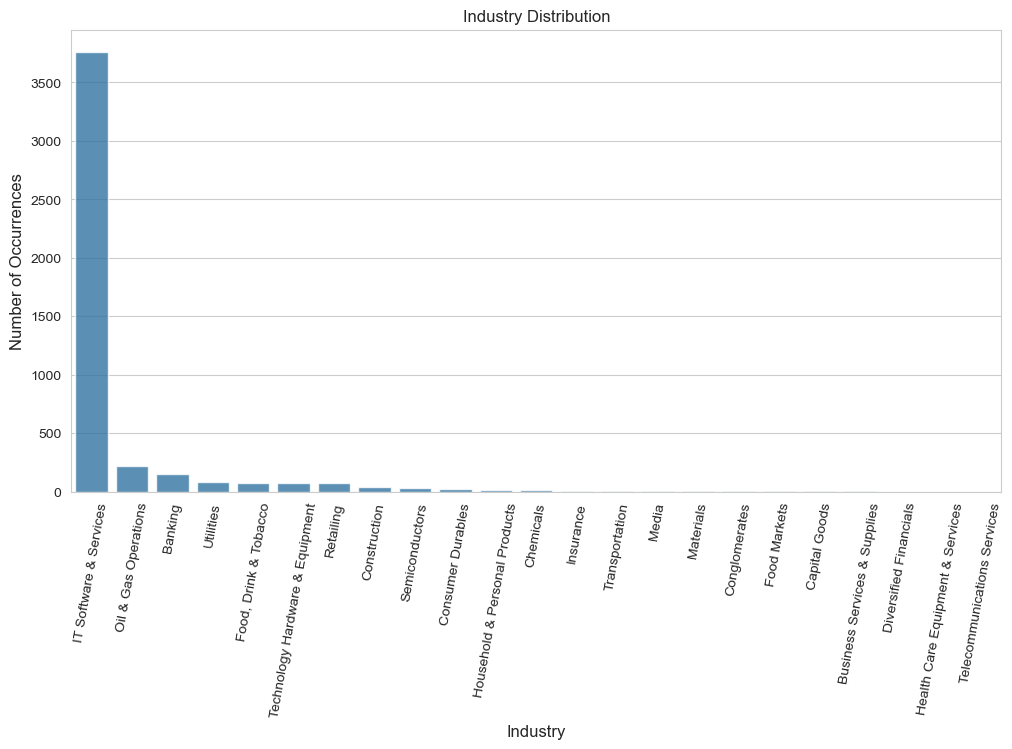

In [8]:
industry_counts = merged_df['Industry'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, alpha=0.8)
plt.title('Industry Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Industry', fontsize=12)
plt.xticks(rotation=80)  
plt.show()


In [9]:
merged_df['Industry'] = merged_df['Industry'].str.strip()

industry_group = merged_df.groupby('Industry')[['LikeCount', 'RetweetCount']].mean()
industry_group.reset_index(inplace=True)
industry_group

,Industry,LikeCount,RetweetCount
0,Banking,4.258065,1.006452
1,Business Services & Supplies,1.333333,0.000000
2,Capital Goods,0.000000,0.000000
3,Chemicals,3.062500,0.625000
4,Conglomerates,0.000000,0.000000
5,Construction,1.024390,0.146341
6,Consumer Durables,1.500000,0.454545
7,Diversified Financials,4.500000,2.000000
8,Food Markets,0.666667,0.166667
9,"Food, Drink & Tobacco",12.733333,3.133333


In [10]:
mean_like_count = df['LikeCount'].mean()
mean_retweet_count = df['RetweetCount'].mean()
mean_like_count, mean_retweet_count

(4.718888518183118, 0.9669701158190744)

Result for hypothesis one: based on the result of the engagement rate of different industries, the tweets linking to the major technology companies particularly in the IT Software & Services industry indeed have a higher engagement rate. However, the table shows that companies from Food, Drink & Tobacco industry have an even higher engagement rate than the IT Software & Services industry. Therefore, hypothesis one cannot be accepted.

## Hypothesis Two
- In the dataset of tweets, those featuring specific ethics-related keywords or hashtags are observed at a higher frequency compared to those expressing enthusiasm. Furthermore, tweets with ethics-related content are anticipated to garner more likes and retweets, surpassing both the general average engagement for tweets lacking these markers and the engagement metrics of similar tweets from a prior timeframe. 
  - ethics_related_keywords = ['ethics', 'moral', 'justice', 'fairness', 'equity', 'rights', 'duty', 'responsibility', 'transparency', 'bias', 'accountability', 'safety', 'privacy', 'governable']
  - enthusiasm_expressing_keywords = ['excited', 'enthusiastic', 'eager', 'thrilled', 'passionate', 'keen', 'animated', 'spirited', 'zealous', 'ardent', 'joyful', 'exhilarated', 'motivated', 'inspired']


source: https://www.techtarget.com/whatis/definition/AI-code-of-ethics

https://www.merriam-webster.com/thesaurus/enthusiastic


In [11]:
ethics_related_keywords = ['ethics', 'moral', 'justice', 'fairness', 'equity', 'rights', 'duty', 'responsibility', 'transparency', 'bias', 'accountability', 'safety', 'privacy', 'governable']
ethics_related_keywords_joined = '|'.join(ethics_related_keywords)
enthusiasm_expressing_keywords = ['excited', 'enthusiastic', 'eager', 'thrilled', 'passionate', 'keen', 'animated', 'spirited', 'zealous', 'ardent', 'joyful', 'exhilarated', 'motivated', 'inspired']
enthusiasm_expressing_keywords_joined = '|'.join(enthusiasm_expressing_keywords)


In [12]:
# referenced from https://stackoverflow.com/questions/32616261/filtering-pandas-dataframe-rows-by-contains-str
ethics_related_tweets = df[df['Text'].str.contains(ethics_related_keywords_joined, case=False) | df['hashtag'].str.contains('|'.join(ethics_related_keywords), case=False)]
enthusiasm_expressing_tweets = df[df['Text'].str.contains(enthusiasm_expressing_keywords_joined, case=False) | df['hashtag'].str.contains('|'.join(enthusiasm_expressing_keywords), case=False)]

In [13]:
non_ethics_non_enthusiasm_tweets = df[~df['Text'].str.contains(ethics_related_keywords_joined, case=False) & ~df['Text'].str.contains(enthusiasm_expressing_keywords_joined, case=False)]

non_likes = non_ethics_non_enthusiasm_tweets['LikeCount'].mean()
non_retweets = non_ethics_non_enthusiasm_tweets['RetweetCount'].mean()

non_likes, non_retweets

(4.742437421474824, 0.9702329177539384)

In [14]:
ethics_avg_likes = ethics_related_tweets['LikeCount'].mean()
ethics_avg_retweets = ethics_related_tweets['RetweetCount'].mean()

enthusiasm_avg_likes = enthusiasm_expressing_tweets['LikeCount'].mean()
enthusiasm_avg_retweets = enthusiasm_expressing_tweets['RetweetCount'].mean()

In [15]:
print(f"Ethics-related tweets: average likes = {ethics_avg_likes}, average retweets = {ethics_avg_retweets}")
print(f"Enthusiasm-expressing tweets: average likes = {enthusiasm_avg_likes}, average retweets = {enthusiasm_avg_retweets}")

Ethics-related tweets: average likes = 2.176190476190476, average retweets = 0.7047619047619048
Enthusiasm-expressing tweets: average likes = 5.324675324675325, average retweets = 0.8051948051948052


Result for hypothesis two: based on the collected ethics-related tweets engagement rate and the enthusiasm-expressing tweets engagement rate, the later one has shown a relatively higher engagement rate than the earlier one. So the second hypothesis is not accepted.

### Hypothesis Three
- Tweets linking to AI-related academic papers that contain the keywords 'ChatGPT', 'model', and 'human' in their titles or abstracts will receive a higher number of likes and retweets compared to tweets linking to AI-related academic papers without these keywords.
    - Specify the AI-related academic papers
    - Fetch the linked URL and save the title and abstract in the JSON file
    - Compare tweets that have keywords and those without keywords


In [16]:
# Source: https://cs.stackexchange.com/questions/7136/where-to-find-published-research-papers
academic_sites = ["ieeexplore.ieee.org", "acm.org", "springer.com", "elsevier.com", "dblp.org", "arxiv.org", "microsoft.com", "eprint.iacr.org", "eccc.weizmann.ac.il", "journals.sagepub.com", "www.sciencedirect.com"]

In [17]:
df_outlinks = df.explode('Outlinks')
df_outlinks['hostname'] = df_outlinks['Outlinks'].apply(extract_the_hostname)
df_outlinks['hostname']

2        us02web.zoom.us
2            twitter.com
2        us02web.zoom.us
2            twitter.com
3            twitter.com
              ...       
49996            lnkd.in
49996            lnkd.in
49996            lnkd.in
49996            lnkd.in
49999          drumup.io
Name: hostname, Length: 23281, dtype: object

In [18]:
df_outlinks['matches'] = df_outlinks['hostname'].str.contains('|'.join(academic_sites))
df_academic = df_outlinks[df_outlinks['matches'] == True]
df_academic['Outlinks']

2064                      https://arxiv.org/abs/1706.03762
2849                  https://arxiv.org/pdf/2301.04655.pdf
2887                      https://arxiv.org/abs/1706.03762
2887                      https://arxiv.org/abs/1706.03762
2960     https://cacm.acm.org/blogs/blog-cacm/268103-wh...
                               ...                        
48325    https://cacm.acm.org/blogs/blog-cacm/269050-ch...
48338    https://customervoice.microsoft.com/Pages/Resp...
48866    https://blogs.microsoft.com/blog/2023/01/23/mi...
49185                     https://arxiv.org/abs/2301.08745
49871    https://journals.sagepub.com/doi/full/10.1177/...
Name: Outlinks, Length: 115, dtype: object

In [19]:
df_academic = df_outlinks[df_outlinks['matches'] == True]
df_academic

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,hostname,company_name,matches
2064,2023-01-22 15:35:55+00:00,1617184289942011907,@alexxubyte Just take a look at the YT channel...,returncode0000,https://twitter.com/returncode0000/status/1617...,https://twitter.com/returncode0000,https://arxiv.org/abs/1706.03762,['https://t.co/IKXCHEkkiI'],0,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='alexxubyte', id=172200213, dis...",[],0,arxiv.org,N/A,True
2849,2023-01-22 16:17:21+00:00,1617194718252638208,ChatGPT is not all you need - Reviewing the pr...,adnanmasood,https://twitter.com/adnanmasood/status/1617194...,https://twitter.com/adnanmasood,https://arxiv.org/pdf/2301.04655.pdf,['https://t.co/EtSusXQAiZ'],1,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#GenerativeAI'],1,arxiv.org,N/A,True
2887,2023-01-22 16:19:38+00:00,1617195291995951104,@senyeezus Not official but the foundation for...,kreta_ceous,https://twitter.com/kreta_ceous/status/1617195...,https://twitter.com/kreta_ceous,https://arxiv.org/abs/1706.03762,"['https://t.co/m2wtmbSUYM', 'https://t.co/Fv5s...",0,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='senyeezus', id=928201772941889...",[],0,arxiv.org,N/A,True
2887,2023-01-22 16:19:38+00:00,1617195291995951104,@senyeezus Not official but the foundation for...,kreta_ceous,https://twitter.com/kreta_ceous/status/1617195...,https://twitter.com/kreta_ceous,https://arxiv.org/abs/1706.03762,"['https://t.co/m2wtmbSUYM', 'https://t.co/Fv5s...",0,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='senyeezus', id=928201772941889...",[],0,arxiv.org,N/A,True
2960,2023-01-22 16:23:18+00:00,1617196216382537728,What ChatGPT and AI-Based Program Generation M...,betterhn50,https://twitter.com/betterhn50/status/16171962...,https://twitter.com/betterhn50,https://cacm.acm.org/blogs/blog-cacm/268103-wh...,"['https://t.co/5uCawefkMS', 'https://t.co/XGqp...",0,0,...,en,"<a href=""https://help.twitter.com/en/using-twi...",NaN,NaN,NaN,[],0,cacm.acm.org,N/A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48325,2023-01-24 05:35:26+00:00,1617757950939889665,ChatGPT in Computer Science Education #Artific...,PMProuk,https://twitter.com/PMProuk/status/16177579509...,https://twitter.com/PMProuk,https://cacm.acm.org/blogs/blog-cacm/269050-ch...,['https://t.co/mWBFnVUe4Y'],0,0,...,en,"<a href=""http://twinybots.com"" rel=""nofollow"">...",NaN,NaN,NaN,"['#ArtificialIntelligence', '#education']",2,cacm.acm.org,N/A,True
48338,2023-01-24 05:35:59+00:00,1617758087498326016,📢Get started with Azure 🤖ChatGPT by signing up...,rorypreddy,https://twitter.com/rorypreddy/status/16177580...,https://twitter.com/rorypreddy,https://customervoice.microsoft.com/Pages/Resp...,['https://t.co/Grxjouy51g'],0,0,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#microsoft', '#azure', '#chatgpt', '#cloud']",4,customervoice.microsoft.com,microsoft,True
48866,2023-01-24 06:04:33+00:00,1617765278758367232,Big news affecting #ChatGPT #DALLE &amp; @GitH...,DigitalColmer,https://twitter.com/DigitalColmer/status/16177...,https://twitter.com/DigitalColmer,https://blogs.microsoft.com/blog/2023/01/23/mi...,['https://t.co/vdh4W8K1Eg'],0,1,...,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='github', id=13334762, displayn...","['#ChatGPT', '#DALLE', '#CoPilot....@Microsoft...",10,blogs.microsoft.com,microsoft,True
49185,2023-01-24 06:20:06+00:00,1617769189581914112,[2301.08745] Is ChatGPT A Good Translator? A P...,tarik_alafif,https://twitter.com/tarik_alafif/status/161776...,https://twitter.com/tarik_alafif,https://arxiv.org/abs/2301.

In [20]:
df_academic['Outlinks'].apply(fetch_url_with_html_tree)


2064     {'title': ['Attention Is All You Need'], 'abst...
2849                         {'title': [], 'abstract': []}
2887     {'title': ['Attention Is All You Need'], 'abst...
2887     {'title': ['Attention Is All You Need'], 'abst...
2960                         {'title': [], 'abstract': []}
                               ...                        
48325                        {'title': [], 'abstract': []}
48338                        {'title': [], 'abstract': []}
48866                        {'title': [], 'abstract': []}
49185    {'title': ['Is ChatGPT A Good Translator? Yes ...
49871                        {'title': [], 'abstract': []}
Name: Outlinks, Length: 115, dtype: object

In [21]:
keywords = ['chatgpt', 'model', 'human']

data = []

with open('urls.json', 'r') as f:
    for line in f:
        json_obj = json.loads(line)
        for url, info in json_obj.items():
            if isinstance(info, dict):
                data.append([url, info.get('title', ''), info.get('abstract', '')])

df_extracted_academic = pd.DataFrame(data, columns=['url', 'title', 'abstract'])

df_extracted_academic


,url,title,abstract
0,https://arxiv.org/abs/1706.03762,[Attention Is All You Need],[The dominant sequence transduction models are...
1,https://arxiv.org/pdf/2301.04655.pdf,[],[]
2,https://cacm.acm.org/blogs/blog-cacm/268103-wh...,[],[]
3,https://www-sciencedirect-com.proxy.library.vc...,[],[]
4,https://cacm.acm.org/news/268971-chatgpt-stole...,[],[]
5,https://arxiv.org/abs/2212.10496,[Precise Zero-Shot Dense Retrieval without Rel...,[While dense retrieval has been shown effectiv...
6,https://arxiv.org/abs/2301.07597,[How Close is ChatGPT to Human Experts? Compar...,[The introduction of ChatGPT has garnered wide...
7,https://techcommunity.microsoft.com/t5/microso...,[\n\t\t],[]
8,https://azure.microsoft.com/en-us/blog/general...,[],[]
9,https://arxiv.org/pdf/2301.08653.pdf,[],[]


In [22]:
df_merged = pd.merge(df_academic, df_extracted_academic, left_on='Outlinks', right_on='url', how='inner')

keywords = ['chatgpt', 'model', 'human']

# Convert the lists in 'title' and 'abstract' to strings
#source: https://stackoverflow.com/questions/45306988/column-of-lists-convert-list-to-string-as-a-new-column
df_merged['title'] = [','.join(map(str, l)) for l in df_merged['title']]
df_merged['abstract'] = [','.join(map(str, l)) for l in df_merged['abstract']]

df_merged['title_abstract'] = df_merged['title'] + ' ' + df_merged['abstract']

df_merged_keywords = df_merged[df_merged['title_abstract'].str.contains('|'.join(keywords), case=False)]

avg_retweets_keywords = df_merged_keywords['RetweetCount'].mean()
avg_likes_keywords = df_merged_keywords['LikeCount'].mean()

avg_retweets_all = df_merged['RetweetCount'].mean()
avg_likes_all = df_merged['LikeCount'].mean()
df_merged_non_keywords = df_merged[~df_merged['title_abstract'].str.contains('|'.join(keywords), case=False)]

avg_retweets_non_keywords = df_merged_non_keywords['RetweetCount'].mean()
avg_likes_non_keywords = df_merged_non_keywords['LikeCount'].mean()

print(f"Tweets without keywords: average retweets = {avg_retweets_non_keywords}, average likes = {avg_likes_non_keywords}")
print(f"Tweets with keywords: average retweets = {avg_retweets_keywords}, average likes = {avg_likes_keywords}")
print(f"All tweets: average retweets = {avg_retweets_all}, average likes = {avg_likes_all}")

Tweets without keywords: average retweets = 0.7816091954022989, average likes = 3.1149425287356323
Tweets with keywords: average retweets = 1.7142857142857142, average likes = 6.928571428571429
All tweets: average retweets = 1.008695652173913, average likes = 4.043478260869565


In [23]:
import json

titles = []
abstracts = []
with open('urls.json','r') as urls:
    for line in urls:
        data = json.loads(line)
        for url in data:
            if 'title' in data[url] and len(data[url]['title']) >= 1:
                titles.append(data[url]['title'][0])
            if 'abstract' in data[url] and len(data[url]['abstract']) >= 1:
                abstracts.append(data[url]['abstract'][0])

all_str = ''.join(titles)


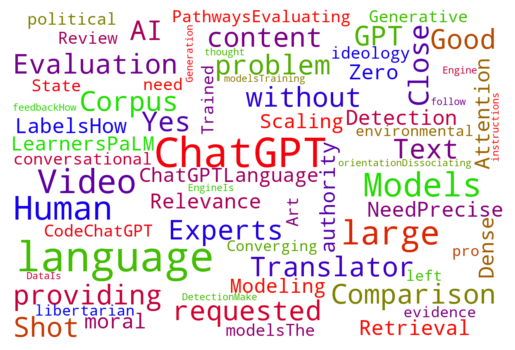

In [24]:
# This wordCloud graph is initially created for analyzing the occurrences of words in the title and abstract dataset.
# source: https://www.datacamp.com/tutorial/wordcloud-python
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white", width=600, height=400, scale=2, colormap='brg').generate(all_str)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
# plt.savefig("wordcloud.png")